In [1]:
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from ljungbox import *
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
file_path = 'Germany_temp.csv'

In [4]:
df_germany = pd.read_csv(file_path)

In [5]:
df_germany.head()

,Date,Avg_Temp
0,01-11-1743,5.468
1,01-12-1743,NaN
2,01-01-1744,NaN
3,01-02-1744,NaN
4,01-03-1744,NaN


In [6]:
df_germany.set_index(pd.to_datetime(df_germany.Date, format="%d-%m-%Y"), drop=True, inplace=True)
df_germany.drop('Date', axis=1, inplace=True)

In [7]:
df_germany.head()

,Avg_Temp
Date,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


In [8]:
df_germany.shape

(3239, 1)

In [9]:
df_germany = df_germany.loc['1970-01-01':]

In [10]:
df_germany.shape

(525, 1)

In [11]:
count_nan = len(df_germany) - df_germany.count()
count_nan

Avg_Temp    1
dtype: int64

In [12]:
df_germany = df_germany.sort_index()

In [13]:
df_germany.Avg_Temp.fillna(method='pad', inplace=True)

In [14]:
count_nan = len(df_germany) - df_germany.count()
count_nan

Avg_Temp    0
dtype: int64

In [15]:
df_germany.describe()

,Avg_Temp
count,525.000000
mean,8.895307
std,6.695429
min,-6.281000
25%,3.306000
50%,8.417000
75%,15.011000
max,22.343000


In [16]:
df_germany['Ticks'] = range(0,len(df_germany.index.values))

In [17]:
df_germany.head(10)

,Avg_Temp,Ticks
Date,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4
1970-06-01,17.371,5
1970-07-01,16.565,6
1970-08-01,17.229,7
1970-09-01,13.804,8


In [18]:
df_germany.tail(10)

,Avg_Temp,Ticks
Date,,
2012-12-01,1.216,515
2013-01-01,-0.067,516
2013-02-01,-0.731,517
2013-03-01,0.394,518
2013-04-01,8.213,519
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522
2013-08-01,18.233,523


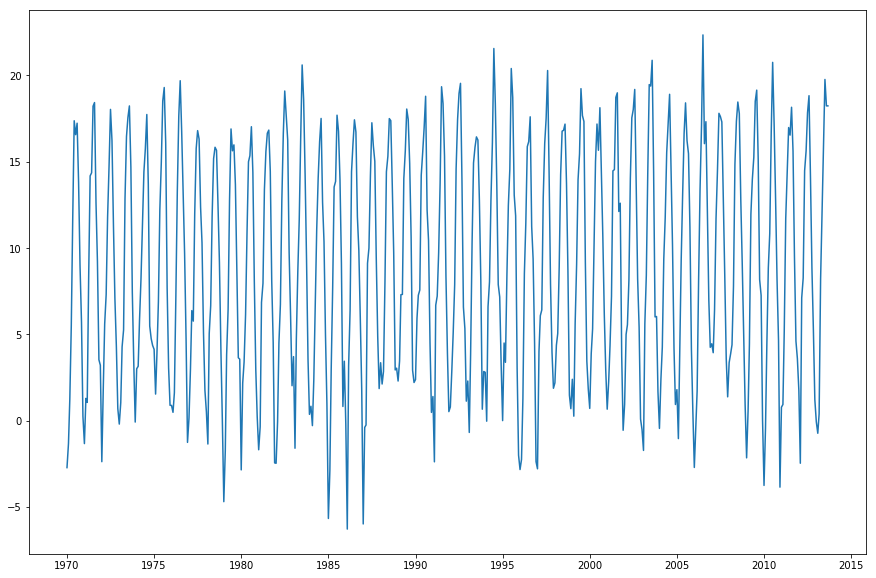

In [19]:
plt.plot(df_germany.Avg_Temp)

In [20]:
def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

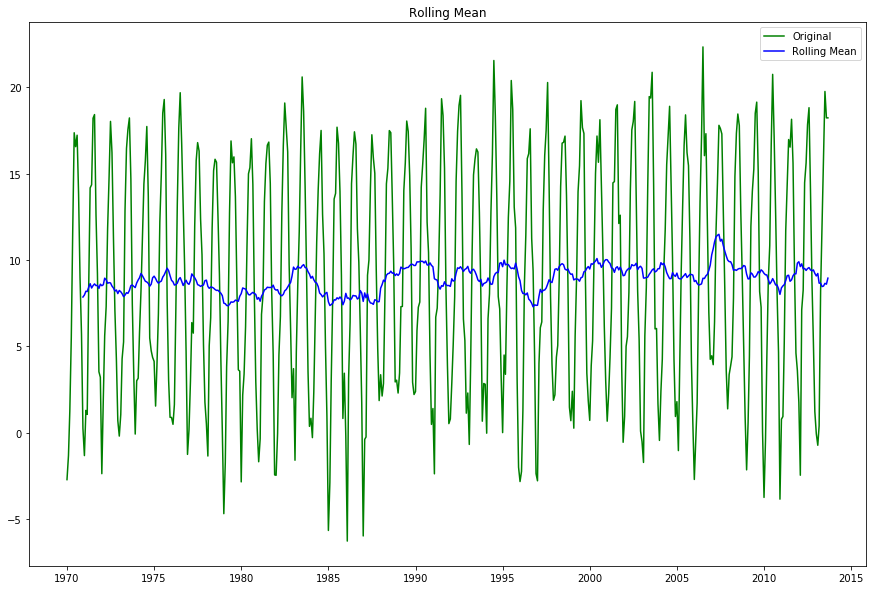

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
dtype: float64
Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64


In [21]:
stationarity_check(df_germany.Avg_Temp)

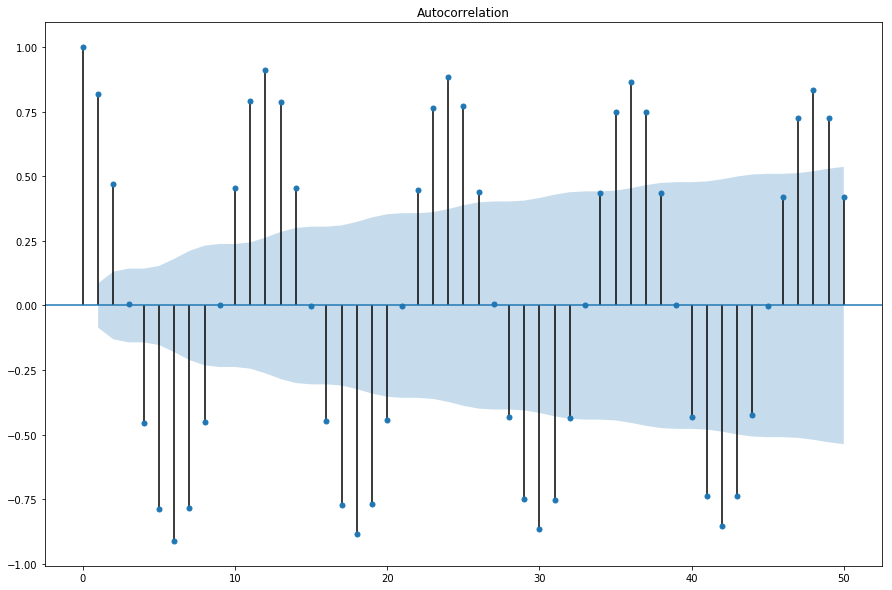

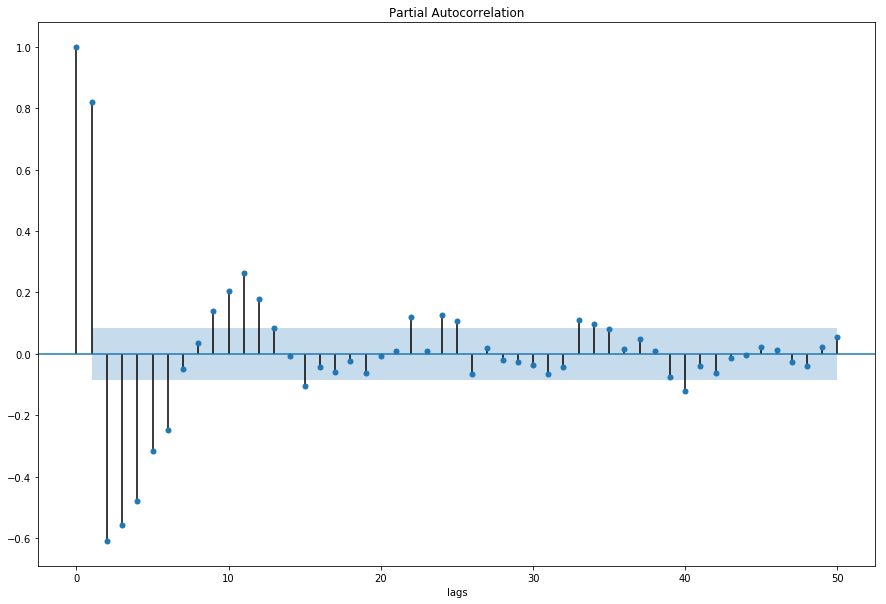

In [22]:
plot_acf(df_germany.Avg_Temp, lags=50)
plot_pacf(df_germany.Avg_Temp, lags=50)
plt.xlabel('lags')
plt.show()

In [23]:
p = q = range(1, 4)
print (p)

range(1, 4)


In [24]:
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_germany.Avg_Temp,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARMA(1, 1) - AIC:2794.013184224457
ARMA(1, 2) - AIC:3051.0480389761497
ARMA(1, 3) - AIC:2852.213870733136
ARMA(2, 3) - AIC:2098.813379205247
ARMA(3, 2) - AIC:2097.482953296742


In [25]:
p = q = range(0, 4)
r = range(0,2)
pqr = itertools.product(p, r, q)
for param in pqr:
    try:
        mod = ARIMA(df_germany.Avg_Temp,order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{} - MSE:{}'.format(param, results.aic, np.sum(np.square(results.resid))))
    except:
        continue

ARIMA(0, 0, 0) - AIC:3489.3808038198003 - MSE:23490.274769626667
ARIMA(0, 0, 1) - AIC:3055.991615279603 - MSE:10290.223904195624
ARIMA(0, 0, 3) - AIC:2737.86108084471 - MSE:5625.684749164624
ARIMA(0, 1, 0) - AIC:2940.7493586725263 - MSE:8333.9942899313
ARIMA(0, 1, 1) - AIC:2854.9864541584325 - MSE:7047.4162317400505
ARIMA(0, 1, 2) - AIC:2799.2077029199677 - MSE:6310.2923859744305
ARIMA(0, 1, 3) - AIC:2758.569924809761 - MSE:5815.862685666353
ARIMA(1, 0, 0) - AIC:2902.0000084299227 - MSE:7719.059090482391
ARIMA(1, 0, 1) - AIC:2794.013184224457 - MSE:6281.604730390481
ARIMA(1, 0, 2) - AIC:3051.0480389761497 - MSE:10117.19486761974
ARIMA(1, 0, 3) - AIC:2852.213870733136 - MSE:6931.612985417505
ARIMA(1, 1, 0) - AIC:2811.586425820675 - MSE:6485.812877257456
ARIMA(2, 0, 0) - AIC:2655.374533034513 - MSE:4849.635199961009
ARIMA(2, 0, 3) - AIC:2098.813379205247 - MSE:1732.0452116978252
ARIMA(2, 1, 0) - AIC:2804.5176925490405 - MSE:6374.204496557235
ARIMA(3, 0, 0) - AIC:2463.2596776940854 - MSE:

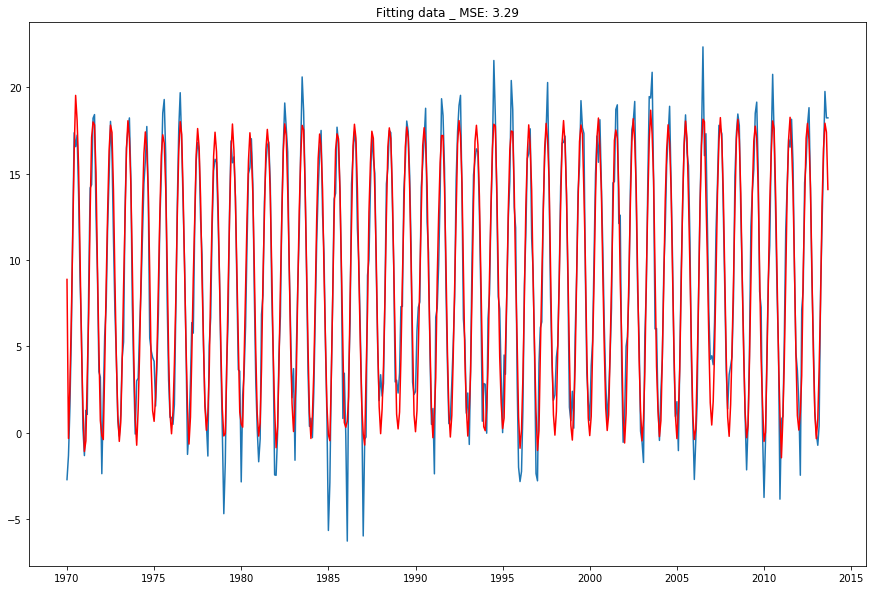

In [26]:
model = ARMA(df_germany.Avg_Temp, order=(3,2))  
results_MA = model.fit()  
plt.plot(df_germany.Avg_Temp)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_germany.Avg_Temp)**2).mean()))
plt.show()

In [27]:
predictions = results_MA.predict('01/01/1970', '12/01/2023')

In [28]:
predictions.head()

1970-01-01     8.875260
1970-02-01    -0.337689
1970-03-01     2.467310
1970-04-01     6.478241
1970-05-01    11.351153
Freq: MS, dtype: float64

In [29]:
mod = sm.tsa.statespace.SARIMAX(df_germany.Avg_Temp,
                                order = (2, 0, 3),
                                seasonal_order= (0,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

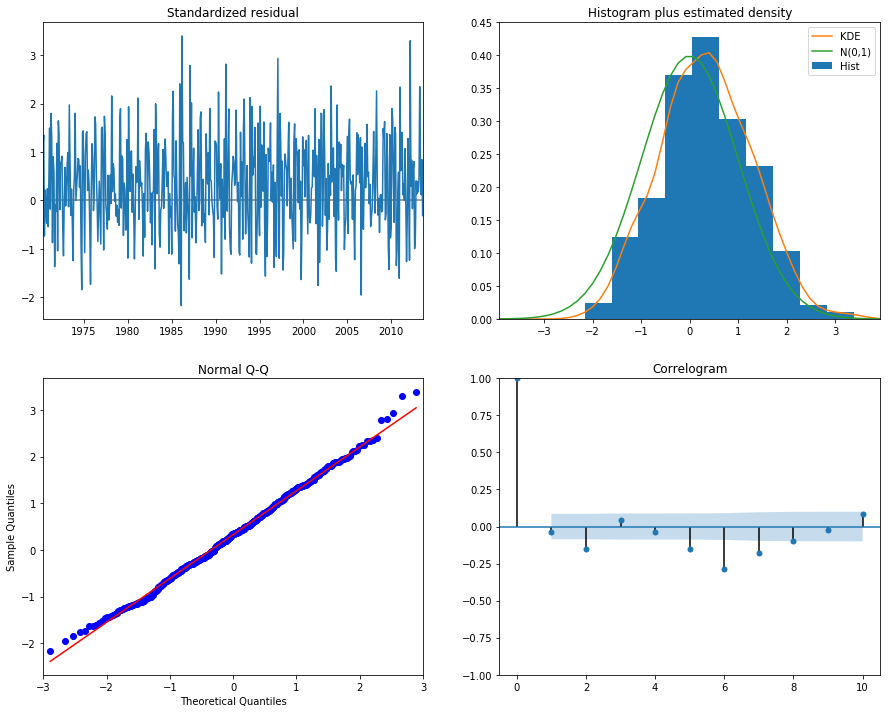

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [31]:
residuals = results.resid

In [32]:
h, pV, Q, cV = lbqtest(residuals, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

lag   p-value          Q    c-value   rejectH0
1       0.000    524.655      2.706      True
2       0.000   1048.513      4.605      True
3       0.000   1572.746      6.251      True
4       0.000   2097.295      7.779      True
5       0.000   2620.933      9.236      True
6       0.000   3133.819     10.645      True
7       0.000   3645.038     12.017      True
8       0.000   4157.162     13.362      True
9       0.000   4669.586     14.684      True
10      0.000   5181.451     15.987      True
11      0.000   5694.281     17.275      True
12      0.000   6203.624     18.549      True
13      0.000   6709.959     19.812      True
14      0.000   7213.731     21.064      True
15      0.000   7717.699     22.307      True
16      0.000   8217.240     23.542      True
17      0.000   8715.015     24.769      True
18      0.000   9210.514     25.989      True
19      0.000   9686.693     27.204      True
